# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [100]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

Keyring is skipped due to an exception: 'keyring.backends'
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.1/270.1 kB 4.8 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.3/83.3 kB 1.5 MB/s eta 0:00:00:00:01


In [101]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

In [ ]:
# Import library for Pytoch


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [2]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2023-01-21 08:11:15--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.120
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  47.7MB/s    in 25s     

2023-01-21 08:11:50 (43.6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [102]:
sagemaker_session = sagemaker.Session()
role = sagemaker.get_execution_role()

bucket = sagemaker_session.default_bucket()
prefix = "project_3"

In [103]:
inputs = sagemaker_session.upload_data(path='./dogImages/', bucket=bucket, key_prefix=prefix)

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-265345480326/project_3


In [104]:
print("input spec (in this case, just an S3 path): {}".format(inputs))

input spec (in this case, just an S3 path): s3://sagemaker-us-east-1-265345480326/project_3


## Class type extraction

* I get in list_classe variable all the classes in train set
* I get in list_train_files variable all the path file in train set

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from glob import glob
%matplotlib inline

In [ ]:
local_path_train = './dogImages/train/'
local_path_test = './dogImages/test/'

In [22]:
list_classes = os.listdir(local_path_train)

In [73]:
list_train_files = glob(local_path_train+'/**/*.jpg', recursive=True)

In [23]:
print(list_classes)

['114.Otterhound', '110.Norwegian_lundehund', '127.Silky_terrier', '091.Japanese_chin', '095.Kuvasz', '061.English_cocker_spaniel', '043.Canaan_dog', '131.Wirehaired_pointing_griffon', '124.Poodle', '087.Irish_terrier', '053.Cocker_spaniel', '064.English_toy_spaniel', '105.Neapolitan_mastiff', '032.Boston_terrier', '017.Bearded_collie', '094.Komondor', '003.Airedale_terrier', '084.Icelandic_sheepdog', '122.Pointer', '098.Leonberger', '125.Portuguese_water_dog', '009.American_water_spaniel', '058.Dandie_dinmont_terrier', '115.Papillon', '006.American_eskimo_dog', '041.Bullmastiff', '085.Irish_red_and_white_setter', '081.Greyhound', '004.Akita', '103.Mastiff', '044.Cane_corso', '118.Pembroke_welsh_corgi', '013.Australian_terrier', '117.Pekingese', '002.Afghan_hound', '025.Black_and_tan_coonhound', '129.Tibetan_mastiff', '093.Kerry_blue_terrier', '023.Bernese_mountain_dog', '070.German_pinscher', '052.Clumber_spaniel', '048.Chihuahua', '088.Irish_water_spaniel', '050.Chinese_shar-pei', '1

In [27]:
list_classes_elab = [x.split('.') for x in list_classes]

In [49]:
df_class = pd.DataFrame(list_classes_elab, columns=['class_id','class_descr'])
#df_class = df_class.sort_values(by=['class_id'])


,class_id,class_descr
0,114,Otterhound
1,110,Norwegian_lundehund
2,127,Silky_terrier
3,091,Japanese_chin
4,095,Kuvasz


In [88]:
df_class.head()

,class_id,class_descr
0,114,Otterhound
1,110,Norwegian_lundehund
2,127,Silky_terrier
3,091,Japanese_chin
4,095,Kuvasz


In [85]:
list_classes[0]

'114.Otterhound'

In [90]:
# Add the column num files for each class
num_files = []
for i, classe in enumerate(list_classes):
    num_files.append(len(os.listdir(local_path_train + classe)))

In [93]:
df_class['num_files'] = num_files

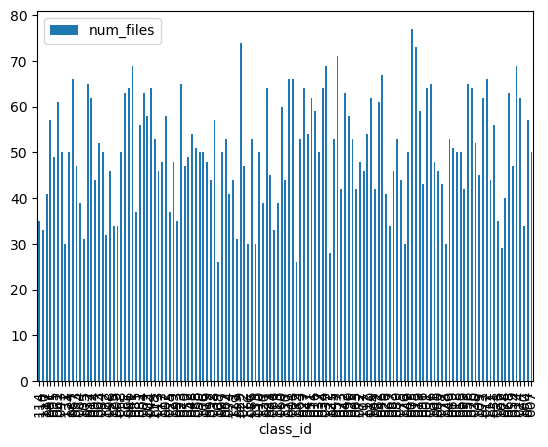

In [98]:
df_class.plot.bar(x='class_id', y='num_files')

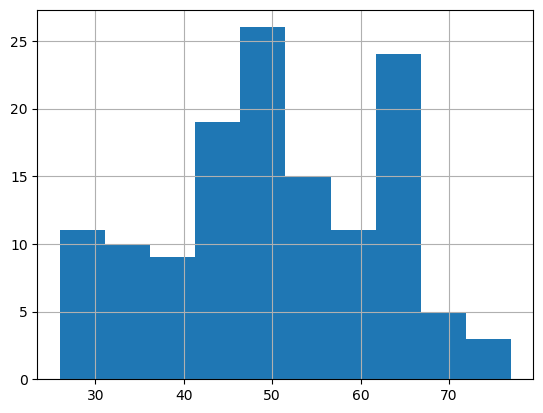

In [99]:
df_class['num_files'].hist()

## Data visualization

* Random visualization of a grid 3x3 of images

In [77]:
random_imgs = np.random.randint(0, len(list_train_files), 9)

In [78]:
list_train_files[random_imgs[0]]

'./dogImages/train/020.Belgian_malinois/Belgian_malinois_01399.jpg'

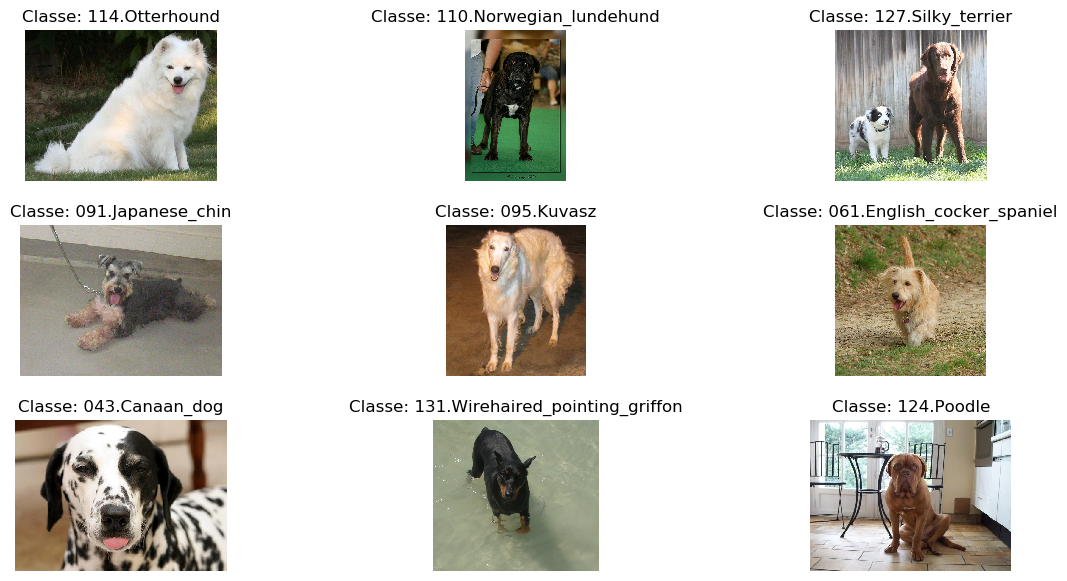

In [83]:
fig, axs = plt.subplots(3,3, figsize=(12,6))
plt.tight_layout()
axs = axs.ravel()
random_imgs = np.random.randint(0, len(list_train_files), 9)

for i, ax in enumerate(axs):
    img = mpimg.imread(list_train_files[random_imgs[i]])
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f'Classe: {list_classes[i]}')

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [110]:
# Instatiate the tuner
from sagemaker.tuner import ContinuousParameter, CategoricalParameter, HyperparameterTuner

In [106]:
#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([32, 64, 128, 256, 512]),
}

In [ ]:
# Import Pytorch estimator
from sagemaker.pytorch import PyTorch

In [111]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [ ]:
#TODO: Create estimators for your HPs

# TODO: Your estimator here
estimator = PyTorch(
    entry_point='hpo.py',
    role=role,
    py_version='py36',
    framework_version='1.8',
    instance_count=1,
    instance_type='ml.m5.large'
)

# TODO: Your HP tuner here
tuner = HyperparamterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit({"training": inputs + '/train'}, wait=True) # TODO: Remember to include your data channels

In [ ]:
# TODO: Get the best estimators and the best HPs

best_estimator = #TODO

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [ ]:
# TODO: Set up debugging and profiling rules and hooks

In [ ]:
# TODO: Create and fit an estimator

estimator = # TODO: Your estimator here

In [ ]:
# TODO: Plot a debugging output.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

## Model Deploying

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy() # TODO: Add your deployment configuration like instance type and number of instances

In [ ]:
# TODO: Run an prediction on the endpoint

image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()